



























































































































































































































































































































































































# Project: Wrangling and Analyzing WeRateDogs Data

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
import time
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns

In [2]:
import datetime
import random

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
#directly load weratedogs data from the link
twitter_archive_enhanced_df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv')

In [5]:
# to check loaded data
twitter_archive_enhanced_df.head(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None


In [6]:
# To check the column datatypes
twitter_archive_enhanced_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [7]:
# check number of rows in each column
twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [8]:
# the requests library are used to download the tweetimage predictions data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [9]:
#the content of the response
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [10]:
#create folder for images
folder_name = 'tweet-image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [11]:
with open(os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [12]:
#save the html file to dataframe
image_predictions_df = pd.read_csv('tweet-image-predictions/image-predictions.tsv', sep='\t')

In [13]:
#return the first rows
image_predictions_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
# to check number of columns and rows
image_predictions_df.shape

(2075, 12)

In [16]:
# number of rows in each column
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [17]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
from tweepy import OAuthHandler
from timeit import default_timer as timer
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [19]:
tweet_ids = twitter_archive_enhanced_df.tweet_id.values
len(tweet_ids)
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
13

Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
15

Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
18

Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
20

Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
23

In [21]:
# Creating list of tweet ids
tweet_id = twitter_archive_enhanced_df['tweet_id']
list(tweet_id)

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [22]:
# read in the JSON data from the text file, and save to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    line = json_file.readline()
    while line:
        data = json.loads(line)
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        json_data = {'tweet_id': data_id, 'retweet_count': data_retweet_count, 'favorite_count': data_favorite_count}
        df_list.append(json_data)
        line = json_file.readline()
tweet_json_df = pd.DataFrame(df_list, columns = ['tweet_id','retweet_count','favorite_count'])

In [23]:
# display first rows 
tweet_json_df.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7010,33830
1,892177421306343426,5301,29340
2,891815181378084864,3482,22069
3,891689557279858688,7228,36953
4,891327558926688256,7765,35323
5,891087950875897856,2602,17814
6,890971913173991426,1666,10370
7,890729181411237888,15761,56891
8,890609185150312448,3624,24530
9,890240255349198849,6101,27971


In [24]:
# number of rows in each column
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Display all dataframes to assess them and find the quality and tidiness issues.
Excel was also used to assess the dataframes.

## Assessing the twitter_archive_enhanced dataframe

In [25]:
# returns first 5 rows
twitter_archive_enhanced_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [26]:
# returns the last 5 rows
twitter_archive_enhanced_df.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [27]:
twitter_archive_enhanced_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
833,768554158521745409,NaN,NaN,2016-08-24 21:02:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Nollie. She's waving at...,7.399792e+17,4.196984e+09,2016-06-07 00:36:02 +0000,https://twitter.com/dog_rates/status/739979191...,12,10,Nollie,None,None,None,None
1386,700518061187723268,NaN,NaN,2016-02-19 03:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vincent. He's the man your girl is wit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700518061...,10,10,Vincent,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @SchafeBacon2016: @dog_rates Slightly distu...,8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836...,11,10,None,None,None,None,None
1300,707693576495472641,NaN,NaN,2016-03-09 22:24:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminus. He's in a tub for some reason...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707693576...,7,10,Jiminus,None,None,None,None
2188,668975677807423489,NaN,NaN,2015-11-24 02:13:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeremy. He hasn't grown into his skin ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668975677...,11,10,Jeremy,None,None,None,None
828,768970937022709760,NaN,NaN,2016-08-26 00:38:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Kirby. His bowl weighs more than him. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768970937...,12,10,Kirby,None,None,None,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,None,None,None,None
318,834574053763584002,NaN,NaN,2017-02-23 01:22:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo fully pupared for a shower. H*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834574053...,13,10,None,doggo,None,None,None
2206,668631377374486528,NaN,NaN,2015-11-23 03:25:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Zeek. He is a grey Cumulonimbus. Zeek is ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668631377...,5,10,Zeek,None,None,None,None
1686,681610798867845120,NaN,NaN,2015-12-28 23:00:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*collapses* 12/10 https://t.co/C7M8mnzHIK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681610798...,12,10,None,None,None,None,None


The source column in the  does not make sense it has additional values which needs to be dropped.

The doggo, flooler, pupper and puppo columns can be fitted into one column.

In [28]:
twitter_archive_enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The rating_numerator column has unexpected values(1776 as the maximum value).
The rating_denominator column has unexpected values(170 being the maximum).

In [29]:
twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The timestamp column has dates in string form.

The in_reply_to_status_id and  in_reply_to_user_id have 78 entries which are not needed.

The retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns has 181 entries which are also not needed.

The expanded_urls column has 2297 entries which indicates missing data.

In [30]:
twitter_archive_enhanced_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

## Assessing the image_predictions dataframe

In [31]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [33]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1044,712717840512598017,https://pbs.twimg.com/media/CeQVF1eVIAAJaTv.jpg,1,Great_Pyrenees,0.732043,True,kuvasz,0.121375,True,Irish_wolfhound,0.049524,True
352,672538107540070400,https://pbs.twimg.com/media/CVVV1wJWoAEcOyk.jpg,1,Siamese_cat,0.383937,False,Chihuahua,0.160274,True,giant_panda,0.147745,False
1078,717790033953034240,https://pbs.twimg.com/media/CfYaOeMWQAAGfyP.jpg,1,car_mirror,0.819106,False,minibus,0.107383,False,cab,0.034846,False
1469,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True
721,685973236358713344,https://pbs.twimg.com/media/CYURBGoWYAAKey3.jpg,1,Siberian_husky,0.450678,True,Eskimo_dog,0.430275,True,malamute,0.118590,True
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
1666,812709060537683968,https://pbs.twimg.com/media/C0dSk98WEAALyya.jpg,1,Irish_setter,0.326873,True,golden_retriever,0.182610,True,Leonberg,0.156912,True
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
730,686618349602762752,https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg,1,Rottweiler,0.441331,True,miniature_pinscher,0.233180,True,Gordon_setter,0.093582,True


The p1, p1_conf, p1_dog, p2 ,p2_conf ,p2_dog, p3, p3_conf, p3_dog columns can be fitted into two columns.

In [34]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
image_predictions_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

## Assessing the tweet_json dataframe

In [36]:
tweet_json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7010,33830
1,892177421306343426,5301,29340
2,891815181378084864,3482,22069
3,891689557279858688,7228,36953
4,891327558926688256,7765,35323


In [37]:
tweet_json_df.tail()

,tweet_id,retweet_count,favorite_count
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112
2326,666020888022790149,423,2293


In [38]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [39]:
tweet_json_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2472.348088,7057.791147
std,6.820795e+16,4186.974566,10967.324100
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,495.000000,1226.000000
50%,7.178418e+17,1149.000000,3053.000000
75%,7.986547e+17,2863.500000,8611.000000
max,8.924206e+17,70785.000000,144955.000000


In [40]:
tweet_json_df.sample(10)

,tweet_id,retweet_count,favorite_count
812,767884188863397888,1266,4474
383,824663926340194305,1649,9946
393,823269594223824897,9240,0
1271,707738799544082433,2211,3746
1369,699779630832685056,1112,2513
1891,674265582246694913,735,1463
362,827653905312006145,2798,14611
2130,669571471778410496,884,1409
1033,741303864243200000,2930,8144
1114,727524757080539137,1089,4122


The tweet_json dataframe does not have any quality or tidiness issues.

## Quality and tidiness issues to be cleaned.

### Quality issues
1. The timestamp column in the twitter_archive_enhanced_df dataframe has dates in string form.

2. The source column in the twitter_archive_enhanced_df dataframe does not make sense it has additional values in the source.

3. The name column in the twitter_archive_enhanced_df dataframe has names which are incorrect; names which are lowercase like 'such','a', 'quite','an' and 'the'.

4. The in_reply_to_status_id and in_reply_to_user_id columns in the twitter_archive_enhanced_df dataframe have 78 entries which are not needed

5. The retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns in the twitter_archive_enhanced_df dataframe has 181 entries which are also not needed.

6. The expanded_urls column in the twitter_archive_enhanced_df dataframe has 2297 entries which indicates missing data.

7. The rating_numerator column in the twitter_archive_enhanced_df dataframe has unexpected values.

8. The rating_denominator column in the twitter_archive_enhanced_df dataframe has unexpected values.


### Tidiness issues
1. The doggo, flooler, pupper and puppo columns in the twitter_archive_enhanced_df can be fitted into one column.

2. The p1, p1_conf, p1_dog, p2 ,p2_conf ,p2_dog, p3, p3_conf, p3_dog columns in the image_predictions dataframe can be fitted into two columns.

3. The three dataframes can be joined to be one dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [41]:
# Make copies of original pieces of data
archive_df=twitter_archive_enhanced_df.copy()
predictions_df=image_predictions_df.copy()
tweet_df=tweet_json_df.copy()

The code above makes copies of the original datasets

In [42]:
# Save the copies
archive_df.to_csv('archive_df.csv', encoding='utf-8', index=False)
predictions_df.to_csv('predictions_df.csv', encoding='utf-8', index=False)
tweet_df.to_csv('tweet_df.csv', encoding='utf-8', index=False)

The code above saves the copies of the original datasets

# Quality issues

## 1.The timestamp column in the twitter_archive_enhanced_df dataframe has dates in string form.

In [43]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Define: Convert timestamp to datetime data type.

#### Code

In [44]:
# used to convert the timestamp strings to datetime data type
archive_df['timestamp'] = pd.to_datetime(archive_df.timestamp)
archive_df['timestamp'] = archive_df.timestamp.dt.floor('s')

#### Test

In [45]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [46]:
archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


The timestamp column data was successfully converted to datetime datatype.

## 2.The source column in the twitter_archive_enhanced_df dataframe does not make sense it has additional values in the source values.

In [47]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Define: Drop the additional values in the source values.Save values between  <a href=" and </a  

#### Code

In [48]:
archive_df['source'] = archive_df['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [51]:
archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [52]:
archive_df.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

The values were successfuly dropped from a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a to Twitter for iPhone

## 3.The name column in the twitter_archive_enhanced_df dataframe has names which are incorrect; names which are lowercase like 'such','a', 'quite','an' and 'the'.

### Define: Rename the values with lowercase to None.

In [53]:
#list of dog names
list(archive_df['name'])

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 

 We see all incorrect names have their first letter has lowercase. We will use this to change them into 'None'. 


#### Code

In [54]:
# we create new column a save our new dog names to it
names=[]
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
archive_df.apply(incorrect_name, axis=1)
archive_df['names'] = names

In [55]:
# lists of dog names in the new column
list(archive_df['names'])

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'None',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'None',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None'

In [56]:
# drop the name column
archive_df= archive_df.drop('name', axis=1)

In [57]:
#rename the new column back to its original name
archive_df.rename(columns = {'names':'name'}, inplace = True)

#### Test

In [58]:
archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,None,None,None,None,Phineas
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,None,None,None,None,Tilly


In [60]:
list(archive_df['name'])

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'None',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'None',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None'

The names were successfully renamed.

## 4.The in_reply_to_status_id and in_reply_to_user_id columns in the twitter_archive_enhanced_df dataframe have 78 entries which are not needed.

In [61]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
name                          2356 non-null object
dtypes: datetime64[ns](1

### Define: Drop rows with replies and then drop  in_reply_to_status_id and in_reply_to_user_id columns.

#### Code

In [62]:
# drop rows with replies
archive_df = archive_df[archive_df.in_reply_to_status_id.isnull()]

In [63]:
# drop in_reply_to_status_id and in_reply_to_user_id columns
archive_df=archive_df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

#### Test

In [64]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2278 non-null int64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
name                          2278 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 284.8+ KB


In [65]:
archive_df.head(3)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,None,None,None,None,Phineas
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,None,None,None,None,Tilly
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,None,None,None,None,Archie


Rows with replies and in_reply_to_status_id and in_reply_to_user_id columns were successfully deleted.

## 5.The retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns in the twitter_archive_enhanced_df dataframe has 181 entries which are also not needed.

In [66]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2278 non-null int64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
name                          2278 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 284.8+ KB


### Define:  Drop rows with retweets and then drop the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns.

#### Code

In [67]:
# drop rows with retweets
archive_df = archive_df[archive_df.retweeted_status_id.isnull()]

In [68]:
#drop the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns
archive_df=archive_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1)

#### Test

In [69]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
name                  2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


In [70]:
archive_df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,None,None,None,None,Phineas


Rows with retweets and the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns were dropped successfully.

## 6.The expanded_urls column in the twitter_archive_enhanced_df dataframe has less entries which indicates missing data.

In [61]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
name                  2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Define: Drop rows with missing data in the expanded_urls.

#### Code

In [71]:
# drop the rows without the expanded urls data
archive_df = archive_df[archive_df.expanded_urls.notnull()]

#### Test

In [73]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
name                  2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.7+ KB


Drop rows with missing data in the expanded_urls were seccessfully dropped.

## 7.The rating_numerator column in the twitter_archive_enhanced_df dataframe has unexpected values.

In [74]:
archive_df.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
420       1
204       1
165       1
144       1
121       1
99        1
88        1
84        1
80        1
75        1
60        1
50        1
45        1
44        1
27        1
26        1
24        1
14       38
13      287
12      485
11      413
10      434
9       153
8        98
7        52
6        32
5        34
4        16
3        19
2         9
1         5
0         1
Name: rating_numerator, dtype: int64

The rating numerator has values greater than 15 which are unexpected.

### Define: Drop rows that have rating_numerator greater than 15.

#### Code

In [75]:
# drops rows with values greater than 15
archive_df = archive_df[archive_df.rating_numerator < 15]

#### Test

In [76]:
archive_df.rating_numerator.value_counts().sort_index(ascending = False)

14     38
13    287
12    485
11    413
10    434
9     153
8      98
7      52
6      32
5      34
4      16
3      19
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

The rows with rating numerator greater than 15 were successfully dropped

## 8.The rating_denominator column in the twitter_archive_enhanced_df dataframe has unexpected values.

In [77]:
archive_df.rating_denominator.value_counts().sort_index(ascending = False)

20       1
11       2
10    2072
2        1
Name: rating_denominator, dtype: int64

The rating denominator has values greater than 10 and less than 10 which are unexpected.

### Define: Drop the remaining tweets with rating_denominator values that are greater than or less than 10

#### Code

In [78]:
# drops rows with rating denominator less/greater than 10
archive_df = archive_df[archive_df.rating_denominator == 10]

#### Test

In [79]:
archive_df.rating_denominator.value_counts().sort_index(ascending = False)

10    2072
Name: rating_denominator, dtype: int64

The rows with rating denominator less/greater than 10 were successfully dropped.

# Tidiness issues

## 1.The doggo, flooler, pupper and puppo columns in the twitter_archive_enhanced_df can be fitted into one column.

In [70]:
archive_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,None,None,None,None,Phineas
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,None,None,None,None,Tilly


In [80]:
# exploring the doggo, floofer, pupper and puppo columns
archive_df[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2072,2072,2072,2072
unique,2,2,2,2
top,None,None,None,None
freq,1989,2062,1844,2048


There are 2 uniques values in doggo, floofer, pupper and puppo columns

### Define: Fit the doggo, floofer, pupper and puppo columns into one column and delete them.

Melting the four columns into one column and then dropping the duplicates made us loose some rows in the doggo column because some tweet id have two dog stages listed in them.

We found the rows with two dogs stages and decided to keep the first dog stage listed in them to avoiding messing our data and manually changing the second dog stage in the rows to None .

#### Code

In [81]:
# created a dataframe with tweet_ids and the four stages to make exploring data easy.
doggo_df=archive_df[['tweet_id','doggo','floofer','pupper','puppo']]

In [82]:
# dataframe with doggo stage dogs
doggos_df = doggo_df[doggo_df.doggo != 'None']

In [83]:
# number of rows and columns
doggos_df.shape

(83, 5)

The dataframe with doggo stage dogs has 83 rows we can manually find tweet ids with two dog stages.

In [84]:
#first 45 rows of doggo stage dogs
doggos_df.head(45)

,tweet_id,doggo,floofer,pupper,puppo
9,890240255349198849,doggo,None,None,None
43,884162670584377345,doggo,None,None,None
99,872967104147763200,doggo,None,None,None
108,871515927908634625,doggo,None,None,None
110,871102520638267392,doggo,None,None,None
121,869596645499047938,doggo,None,None,None
172,858843525470990336,doggo,None,None,None
191,855851453814013952,doggo,None,None,puppo
200,854010172552949760,doggo,floofer,None,None
240,846514051647705089,doggo,None,None,None


In [86]:
#last 38 rows of doggo stage dogs
doggos_df.tail(38)

,tweet_id,doggo,floofer,pupper,puppo
724,782747134529531904,doggo,None,None,None
727,782305867769217024,doggo,None,None,None
731,781655249211752448,doggo,None,None,None
733,781308096455073793,doggo,None,pupper,None
746,780074436359819264,doggo,None,None,None
780,775733305207554048,doggo,None,None,None
782,775364825476165632,doggo,None,None,None
807,771908950375665664,doggo,None,None,None
835,768193404517830656,doggo,None,None,None
839,767191397493538821,doggo,None,None,None


The tweet ids below has two dog stages.

 tweet_id         	doggo	floofer	pupper	puppo
1. 855851453814013952	doggo	None	None	puppo
2. 854010172552949760	doggo	floofer	None	None
3. 817777686764523521	doggo	None	pupper	None
4. 808106460588765185	doggo	None	pupper	None
5. 801115127852503040	doggo	None	pupper	None
6. 785639753186217984	doggo	None	pupper	None
7. 781308096455073793	doggo	None	pupper	None
8. 759793422261743616	doggo	None	pupper	None
9. 751583847268179968	doggo	None	pupper	None
10. 741067306818797568	doggo	None	pupper	None
11. 733109485275860992	doggo	None	pupper	None

Keep each first dog stage  listed in them to avoiding messing our data and manually changing the second dog stage in the rows to None .

In [87]:
archive_df.loc[archive_df.tweet_id == 855851453814013952, 'puppo'] = 'None'
archive_df.loc[archive_df.tweet_id == 854010172552949760, 'floofer'] = 'None'
archive_df.loc[archive_df.tweet_id == 817777686764523521, 'pupper'] = 'None'
archive_df.loc[archive_df.tweet_id == 808106460588765185, 'pupper'] = 'None'
archive_df.loc[archive_df.tweet_id == 801115127852503040, 'pupper'] = 'None'
archive_df.loc[archive_df.tweet_id == 785639753186217984, 'pupper'] = 'None'
archive_df.loc[archive_df.tweet_id == 781308096455073793, 'pupper'] = 'None'
archive_df.loc[archive_df.tweet_id == 759793422261743616, 'pupper'] = 'None'
archive_df.loc[archive_df.tweet_id == 751583847268179968, 'pupper'] = 'None'
archive_df.loc[archive_df.tweet_id == 741067306818797568, 'pupper'] = 'None'
archive_df.loc[archive_df.tweet_id == 733109485275860992, 'pupper'] = 'None'

Melt the doggo, floofer, pupper and puppo columns into one column named dog_stage

In [89]:
#Melt the doggo floofer pupper and puppo columns into one column named dog_stage
archive_df = pd.melt(archive_df, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls','rating_numerator', 'rating_denominator', 'name'], value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name = 'types', value_name = 'dog_stage')

In [90]:
archive_df.dog_stage.value_counts()

None       7954
pupper      219
doggo        83
puppo        23
floofer       9
Name: dog_stage, dtype: int64

Melting caused the dataframe to have tweet_id duplicates. We drop the duplicates

In [93]:
sum(archive_df.duplicated('tweet_id'))

6216

In [94]:
# dataframe sorted by dog type so that we can drop the duplicates that don't contain a dog type.
archive_df = archive_df.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

In [97]:
archive_df.dog_stage.value_counts()

None       1738
pupper      219
doggo        83
puppo        23
floofer       9
Name: dog_stage, dtype: int64

In [99]:
archive_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,types,dog_stage
1995,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,doggo,None
1994,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,doggo,None


In [100]:
# Delete column 'types' which was created by the four columns
archive_df = archive_df.drop('types',axis=1)

#### Test

In [103]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 1995 to 6527
Data columns (total 9 columns):
tweet_id              2072 non-null int64
timestamp             2072 non-null datetime64[ns]
source                2072 non-null object
text                  2072 non-null object
expanded_urls         2072 non-null object
rating_numerator      2072 non-null int64
rating_denominator    2072 non-null int64
name                  2072 non-null object
dog_stage             2072 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 161.9+ KB


In [102]:
archive_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1995,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,None
1994,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,None


The doggo, floofer, pupper and puppo columns were fitted into one column dog_stage and were successfully deleted

## 2.The p1, p1_conf,	p1_dog,	p2	,p2_conf	,p2_dog,	p3, 	p3_conf,	p3_dog	columns in the image_predictions dataframe can be fitted into two columns.

In [104]:
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define: Create two new columns in predictions_df called breed and p_confidence and copy the breed with the highest confidence level into the breed column and the associated confidence level into the pconfidence column. And where p1_dog, p2_dog and p3_dog are False, set breed as 'none' and confidence to 0. Then delete the p1, p1_conf, p1_dog, p2 ,p2_conf ,p2_dog, p3, p3_conf, p3_dog columns

#### Code

In [105]:
# Create two new columns, breed and p_confidence
breed = []
pconfidence = []
# copy the breed with the highest confidence level into the breed column and the associated confidence level into the pconfidence column. And where p1_dog, p2_dog and p3_dog are False, set breed as 'none' and confidence to 0
def breed_pconfidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        pconfidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        pconfidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        pconfidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        pconfidence.append(0)
predictions_df.apply(breed_pconfidence, axis=1)
predictions_df['breed'] = breed
predictions_df['pconfidence'] = pconfidence


In [107]:
# Drop predictions and prediction probability columns
predictions_df = predictions_df.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [109]:
# rename pconfidence to p_confidence for better analysis
predictions_df.rename(columns = {'pconfidence':'p_confidence'}, inplace = True)

#### Test

In [110]:
predictions_df.head(3)

,tweet_id,jpg_url,breed,p_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461


In [111]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id        2075 non-null int64
jpg_url         2075 non-null object
breed           2075 non-null object
p_confidence    2075 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


The p1, p1_conf, p1_dog, p2 ,p2_conf ,p2_dog, p3, p3_conf, p3_dog columns in the image_predictions dataframe were fitted into two columns and deleted successfully.

##  3.The three dataframes can be joined to be one dataframe.

### Define: Merge the three dataframes to form one dataframe.

#### Code

In [112]:
#merge the twitter and tweets dataframe using left join
archive_df = pd.merge(archive_df, tweet_df, on = 'tweet_id', how = 'left')

#### Test

In [113]:
archive_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,199.0,396.0
1,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,490.0,682.0


In [114]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 11 columns):
tweet_id              2072 non-null int64
timestamp             2072 non-null datetime64[ns]
source                2072 non-null object
text                  2072 non-null object
expanded_urls         2072 non-null object
rating_numerator      2072 non-null int64
rating_denominator    2072 non-null int64
name                  2072 non-null object
dog_stage             2072 non-null object
retweet_count         2064 non-null float64
favorite_count        2064 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 194.2+ KB


The twitter and tweets dataframes were merged successfully.

### Cleaning the merged dataframe

The merge of the tweet_df table with the archive_df caused the data types for retweet_count and favorite_count to change from int64 to float64. There is also missing data for these fields.

In [115]:
# drop rows without favorite count data
archive_df = archive_df[~(archive_df.retweet_count.isna() | archive_df.favorite_count.isna())]

Change retweet_count and favorite_count columns back to int type.

In [116]:
# Change retweet_count and favorite_count columns back to int type.
archive_df.retweet_count = archive_df.retweet_count.astype(int)
archive_df.favorite_count = archive_df.favorite_count.astype(int)

In [118]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2071
Data columns (total 11 columns):
tweet_id              2064 non-null int64
timestamp             2064 non-null datetime64[ns]
source                2064 non-null object
text                  2064 non-null object
expanded_urls         2064 non-null object
rating_numerator      2064 non-null int64
rating_denominator    2064 non-null int64
name                  2064 non-null object
dog_stage             2064 non-null object
retweet_count         2064 non-null int64
favorite_count        2064 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 193.5+ KB


Use inner join to merge the merged archive twitter and tweet_json dataframe to image predictions dataframe on tweet_ids so as to only keep records that have matching values in both tables(tweet_ids)

In [119]:
# Use inner join to merge as to only keep records that have matching values in both tables(tweet_ids)
archive_df = pd.merge(archive_df, predictions_df, on = 'tweet_id', how = 'inner')

#### Test

In [120]:
archive_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,p_confidence
0,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,199,396,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,Unknown,0.0
1,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,490,682,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,Unknown,0.0


In [122]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 14 columns):
tweet_id              1941 non-null int64
timestamp             1941 non-null datetime64[ns]
source                1941 non-null object
text                  1941 non-null object
expanded_urls         1941 non-null object
rating_numerator      1941 non-null int64
rating_denominator    1941 non-null int64
name                  1941 non-null object
dog_stage             1941 non-null object
retweet_count         1941 non-null int64
favorite_count        1941 non-null int64
jpg_url               1941 non-null object
breed                 1941 non-null object
p_confidence          1941 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 227.5+ KB


The three dataframes were merged successfully.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [123]:
#make a copy of the cleaned dataset
twitter_archive_master=archive_df.copy()
twitter_archive_master=twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [3]:
# save cleaned dataset
master_df=pd.read_csv('twitter_archive_master.csv')

In [125]:
master_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,p_confidence
0,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,199,396,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,Unknown,0.0
1,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,490,682,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,Unknown,0.0


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

Now that the data is trimmed and cleaned,we Compute statistics and create visualizations for the data.

In [111]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,p_confidence
0,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,199,396,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,Unknown,0.000000
1,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,490,682,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,Unknown,0.000000
2,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,None,74,279,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670
3,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,None,53,171,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376
4,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,None,None,85,225,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175


###  The stage with most dogs.

In [126]:
master_df.dog_stage.value_counts()

None       1640
pupper      200
doggo        72
puppo        22
floofer       7
Name: dog_stage, dtype: int64

The pupper stage has the most dogs.

### Which dog breed is most liked?

In [127]:
master_df.breed.value_counts()

Unknown                        302
golden_retriever               153
Labrador_retriever             100
Pembroke                        94
Chihuahua                       89
pug                             62
toy_poodle                      49
chow                            47
Samoyed                         41
Pomeranian                      40
malamute                        33
Chesapeake_Bay_retriever        31
cocker_spaniel                  30
French_bulldog                  30
miniature_pinscher              24
Eskimo_dog                      22
German_shepherd                 21
Cardigan                        21
beagle                          20
Shih-Tzu                        20
Siberian_husky                  19
Staffordshire_bullterrier       19
Rottweiler                      18
Shetland_sheepdog               18
Maltese_dog                     18
Italian_greyhound               17
Lakeland_terrier                17
basset                          17
kuvasz              

The golden_retriever breed is the most owned dogs.

### Where was most data collected from?

In [128]:
master_df.source.value_counts()

Twitter for iPhone    1904
Twitter Web Client      28
TweetDeck                9
Name: source, dtype: int64

Most data was collected from Twitter for iphone

### The tweet with the most favourite tweets.

In [130]:
master_df.sort_values(by = 'favorite_count', ascending = False).head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,p_confidence
1690,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,70785,144955,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333


### The tweet with most retweeted tweets.

In [131]:
master_df.sort_values(by = 'retweet_count', ascending = False).head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,p_confidence
1690,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,70785,144955,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333


744234799360020481 tweet id has the most favorite tweets and retweets.

### The tweet with the least favourite tweets.

In [132]:
master_df.sort_values(by = 'favorite_count', ascending = True).head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,p_confidence
89,666102155909144576,2015-11-16 03:55:04,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,11,66,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,English_setter,0.298617


### The tweet with the least retweeted tweets.

In [133]:
master_df.sort_values(by = 'retweet_count', ascending = True).head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,p_confidence
89,666102155909144576,2015-11-16 03:55:04,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,11,66,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,English_setter,0.298617


666102155909144576 tweet id has the least favorite tweets and retweets.

### Does the number of favorite tweets depend on the source

In [134]:
master_df.groupby(['source'],as_index=False)['favorite_count'].mean()

,source,favorite_count
0,TweetDeck,3757.333333
1,Twitter Web Client,5151.785714
2,Twitter for iPhone,7818.142857


Twitter for iphone has the most average favorite tweets

### Does the number of retweets depend on the source

In [135]:
master_df.groupby(['source'],as_index=False)['retweet_count'].mean()

,source,retweet_count
0,TweetDeck,1597.000000
1,Twitter Web Client,2088.035714
2,Twitter for iPhone,2259.127626


Twitter for iphone has the most average retweets

### Does the number of favourite tweets depend on the dog stage.

In [136]:
master_df.groupby(['dog_stage'],as_index=False)['favorite_count'].mean()

,dog_stage,favorite_count
0,None,7349.426220
1,doggo,17367.500000
2,floofer,11231.857143
3,pupper,6254.345000
4,puppo,19581.772727


The puppo dog stage has the highest average favorite count.

### Does the number of retweets depend on the dog stage.

In [137]:
master_df.groupby(['dog_stage'],as_index=False)['retweet_count'].mean()

,dog_stage,retweet_count
0,None,2087.867073
1,doggo,5823.875000
2,floofer,3988.714286
3,pupper,1928.215000
4,puppo,5328.727273


The doggo dog stage has the highest average retweet count.

### Does the number of favourite tweets depend on the dog breed

In [138]:
master_df.groupby(['breed'],as_index=False)['favorite_count'].mean()

,breed,favorite_count
0,Afghan_hound,14716.000000
1,Airedale,4496.250000
2,American_Staffordshire_terrier,7193.866667
3,Appenzeller,6273.500000
4,Australian_terrier,9556.500000
5,Bedlington_terrier,21562.000000
6,Bernese_mountain_dog,6247.545455
7,Blenheim_spaniel,7925.200000
8,Border_collie,7670.000000
9,Border_terrier,11680.285714


 The dog breeds are 113, we won't be able to find the group with the least and most favourite count.
    A dataframe with breeds and favorite count mean is created for better analysis.

In [139]:
groupby_breed=master_df.groupby(['breed'],as_index=False)['favorite_count'].mean()

In [140]:
groupby_breed.shape

(113, 2)

In [141]:
groupby_breed.sort_values(by = 'favorite_count', ascending = False).head(2)

,breed,favorite_count
5,Bedlington_terrier,21562.0
54,Saluki,20813.0


The Bedlington_terrier breed has the highest average favourite tweets.

In [142]:
groupby_breed.sort_values(by = 'favorite_count', ascending = True).head(2)

,breed,favorite_count
12,Brabancon_griffon,746.666667
90,groenendael,979.000000


The Brabancon_griffon breed has the lowest average favourite tweets.

### Does the number of retweets depend on the dog breed.

The dog breeds are 113, we won't be able to find the group with the least and most retweet count. A dataframe with breeds and retweet count mean is created for better analysis.

In [143]:
groupby_breeds=master_df.groupby(['breed'],as_index=False)['retweet_count'].mean()

In [144]:
groupby_breeds.sort_values(by = 'retweet_count', ascending = False).head(2)

,breed,retweet_count
5,Bedlington_terrier,6688.666667
0,Afghan_hound,4789.000000


The Bedlington_terrier breed has the highest average retweets.

In [145]:
groupby_breeds.sort_values(by = 'retweet_count', ascending = True).head(2)

,breed,retweet_count
90,groenendael,221.0
12,Brabancon_griffon,228.0


The groenendael breed has the lowest average retweets.

### Insights:
1. Most dogs are in the pupper stage with 200 dogs while the puppo stage with 7 dogs has the least dogs.

2. The golden_retriever is the most liked breed with 153 dogs and kept by most people from by a Labrador_retriever with 100 dogs while the Scotch_terrier, standard_schnauzer, EntleBucher, silky_terrier, Irish_wolfhound, Japanese_spaniel and Bouvier_des_Flandres breeds are the less liked and kept dogs with one dog each.

3. The Twitter for iPhone is the source where most data was collected(1904 tweets) from while TweetDeck(7 tweets) was the source where the least data was collected from.      

### Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8699138080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8698d093c8>]], dtype=object)

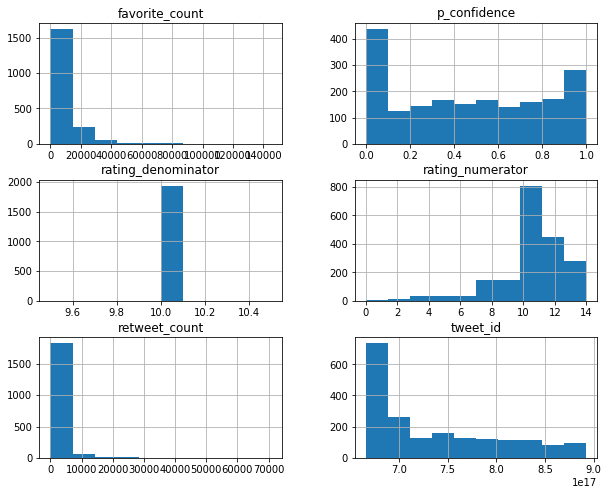

In [147]:
master_df.hist(figsize=(10,8))

Histograms shows disribution of variables.
For the rating_denominator all values are 10 and the for the p_confidence values ranges from 0 to 1

Text(0.5,1,'P CONFIDENCE BOXPLOT')

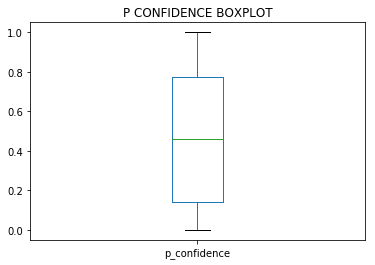

In [148]:
master_df['p_confidence'].plot(kind='box');
plt.title('P CONFIDENCE BOXPLOT')

### The stage with most dogs.

Text(0.5,1,'DOG STAGE PIE CHART')

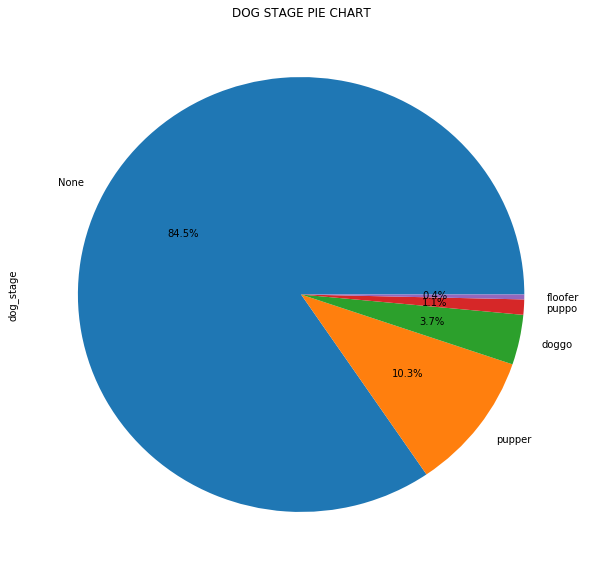

In [149]:
#create the percent function
def percent(value):
    percent=round(master_df[value].value_counts()/len(master_df)*100)
    return percent
#returns a pie chart with percentages
value=percent('dog_stage')
master_df['dog_stage'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(10,10)) #%1.0f%% returns a percentage in a whole number without decimal points.
plt.title('DOG STAGE PIE CHART')

The pie chart shows 84.5% of the tweet ids did not give the stage of the dogs, 10.3% of the tweets ids showed there dogs are at pupper stage, 3.7% at the doggo stage, 1.1% at the puppo stage and 0.4% at the floofer stage.

### Where was most data collected from?

Text(0.5,1,'BREED PIECHART')

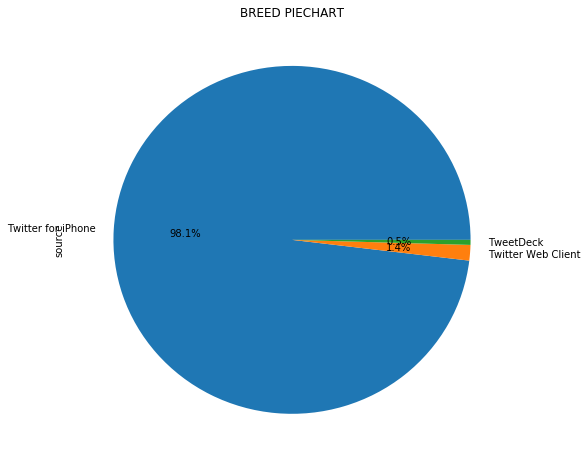

In [150]:
value=percent('source')
master_df['source'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(8,8)) #%1.1f%% returns a percentage with one decimalpoint.
plt.title('BREED PIECHART')

98.1% of the data was collected from Twitter for iPhone, 1.4% from Twitter Web Client and 0.5% from TwitterDeck.

### Which dog breed is most liked?

Text(0,0.5,'VALUE COUNT')

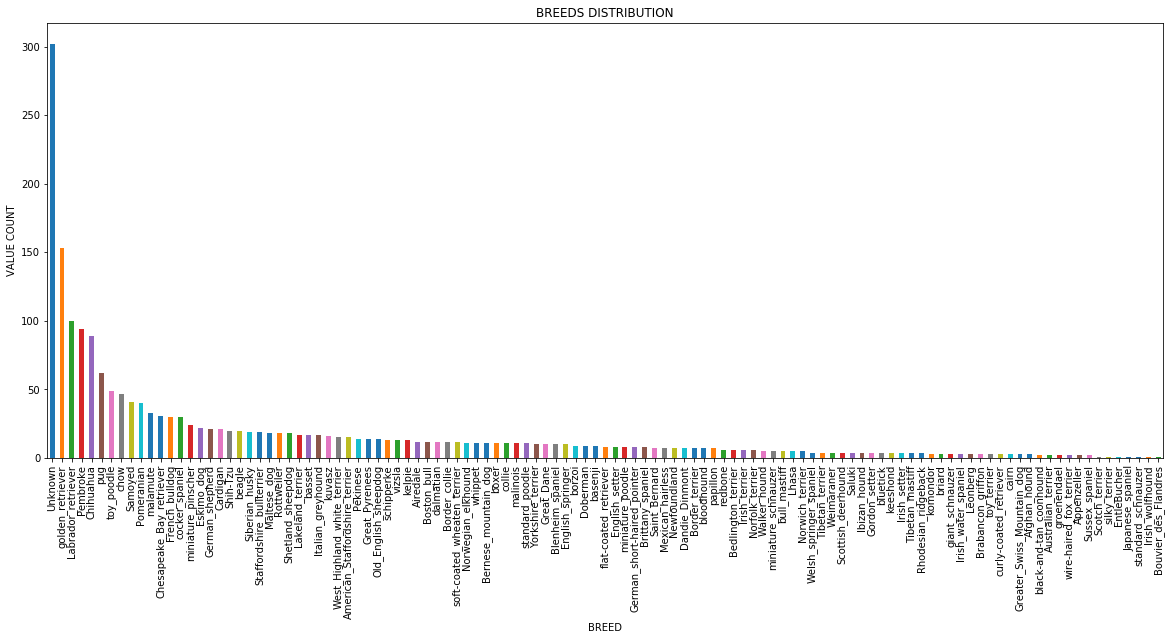

In [8]:
master_df['breed'].value_counts().plot(kind='bar',figsize=(20,8))
plt.title('BREEDS DISTRIBUTION')
plt.xlabel('BREED')
plt.ylabel('VALUE COUNT')

### Does the number of favorite tweets depend on the dog stage.

Text(0,0.5,'AVERAGE FAVORITE COUNT')

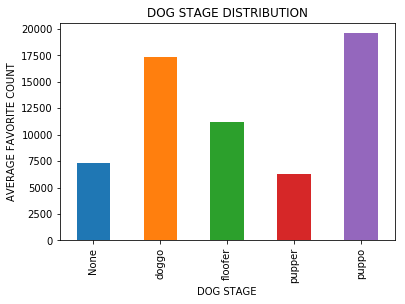

In [151]:
master_df.groupby('dog_stage').favorite_count.mean().plot(kind='bar')
plt.title('DOG STAGE DISTRIBUTION')
plt.xlabel('DOG STAGE')
plt.ylabel('AVERAGE FAVORITE COUNT')

The puppo stage has the highest average favourite tweets

### Does the number of retweets depend on the dog stage.

Text(0,0.5,'AVERAGE RETWEET COUNT')

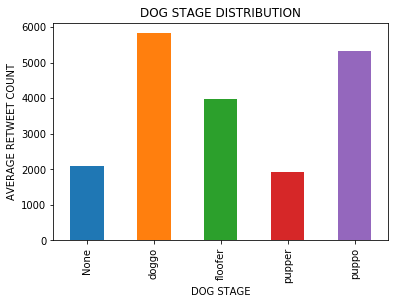

In [152]:
master_df.groupby('dog_stage').retweet_count.mean().plot(kind='bar')
plt.title('DOG STAGE DISTRIBUTION')
plt.xlabel('DOG STAGE')
plt.ylabel('AVERAGE RETWEET COUNT')

The doggo stage has the highest average retweets.

### Does the number of favorite tweets depend on the source

Text(0,0.5,'AVERAGE FAVORITE COUNT')

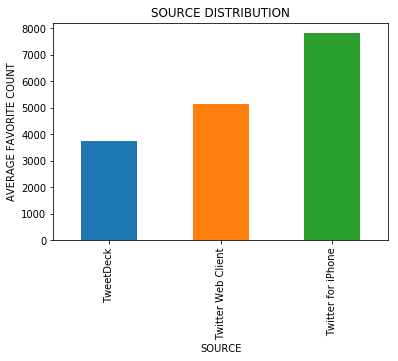

In [155]:
master_df.groupby('source').favorite_count.mean().plot(kind='bar')
plt.title('SOURCE DISTRIBUTION')
plt.xlabel('SOURCE')
plt.ylabel('AVERAGE FAVORITE COUNT')

The Twitter for iPhone has the highest average favourite tweets

### Does the number of retweets depend on the source

Text(0,0.5,'AVERAGE RETWEET COUNT')

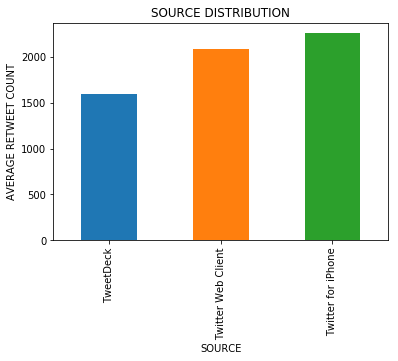

In [156]:
master_df.groupby('source').retweet_count.mean().plot(kind='bar')
plt.title('SOURCE DISTRIBUTION')
plt.xlabel('SOURCE')
plt.ylabel('AVERAGE RETWEET COUNT')

The Twitter for iPhone has the highest average retweets

### Does the number of favorite tweets depend on the dog breed.

Text(0,0.5,'AVERAGE FAVORITE COUNT')

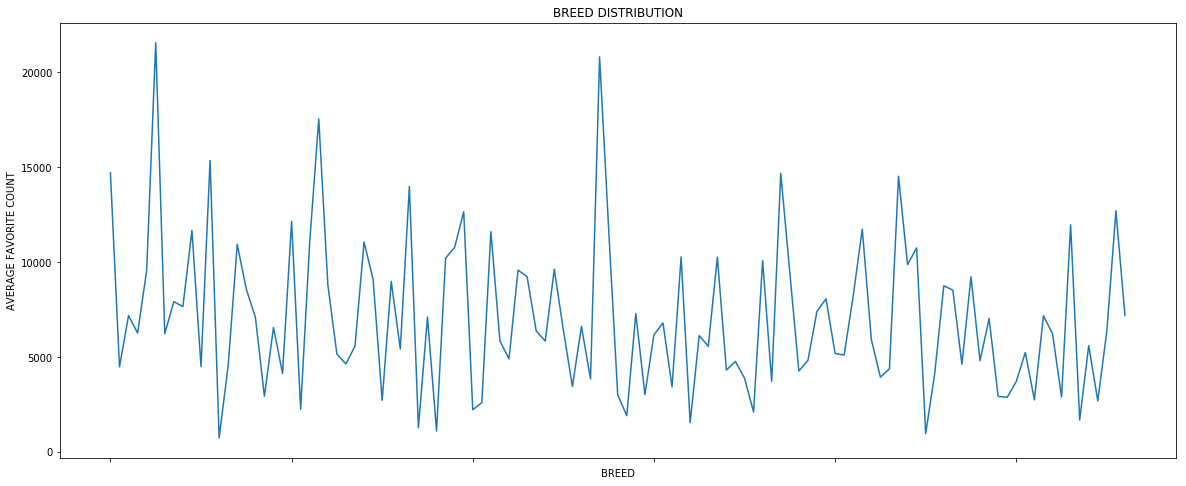

In [158]:
master_df.groupby('breed').favorite_count.mean().plot(kind='line',figsize=(20,8))
plt.title('BREED DISTRIBUTION')
plt.xlabel('BREED')
plt.ylabel('AVERAGE FAVORITE COUNT')

Text(0,0.5,'AVERAGE FAVORITE COUNT')

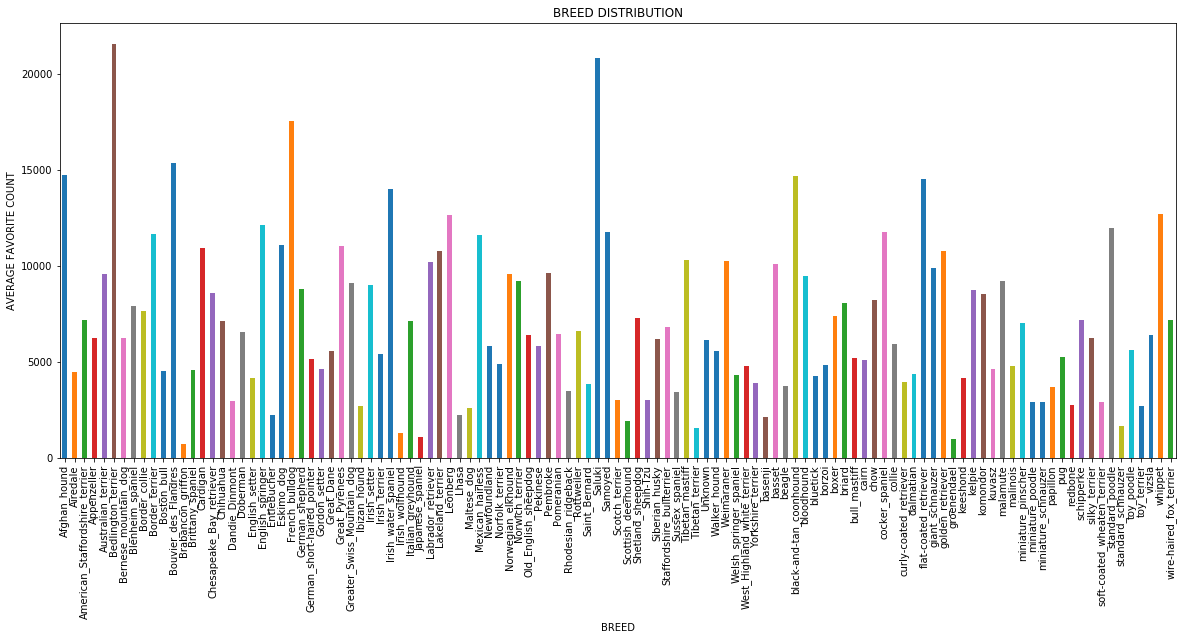

In [159]:
master_df.groupby('breed').favorite_count.mean().plot(kind='bar',figsize=(20,8))
plt.title('BREED DISTRIBUTION')
plt.xlabel('BREED')
plt.ylabel('AVERAGE FAVORITE COUNT')

The Bedlington_terrier breed has the highest average favourite tweets.

### Does the number of retweets depend on the dog breed.

Text(0,0.5,'AVERAGE RETWEET COUNT')

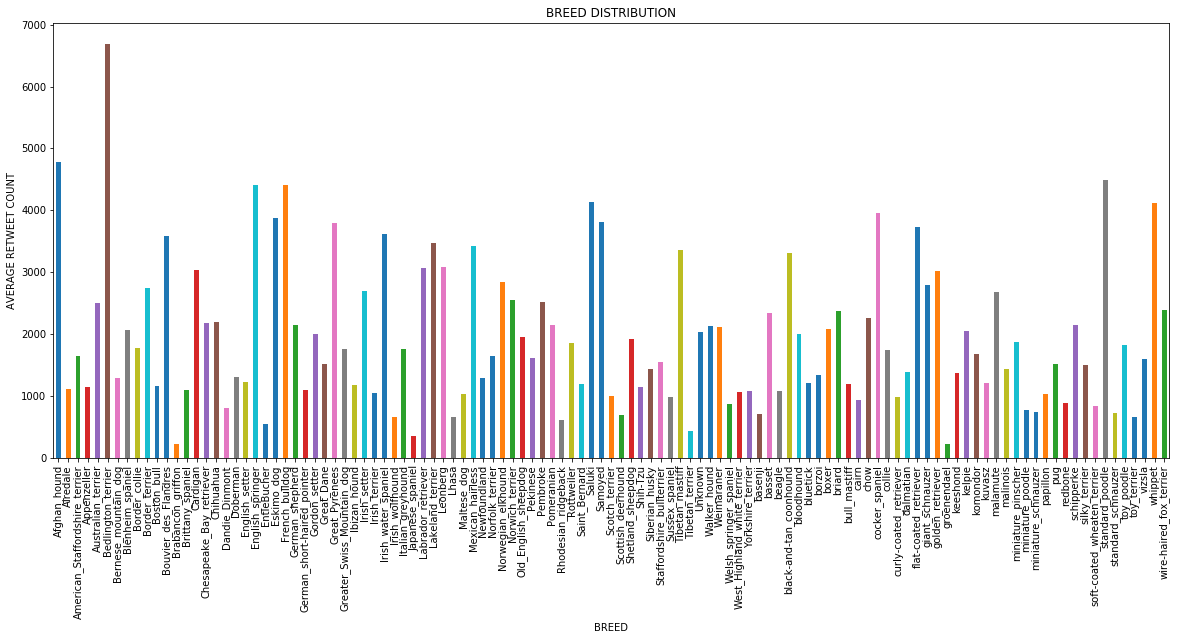

In [9]:
master_df.groupby('breed').retweet_count.mean().plot(kind='bar',figsize=(20,8))
plt.title('BREED DISTRIBUTION')
plt.xlabel('BREED')
plt.ylabel('AVERAGE RETWEET COUNT')

The Bedlington_terrier breed has the highest retweets.

### Realtionship between retweet count and favorite count

Text(0,0.5,'FAVORITE COUNT')

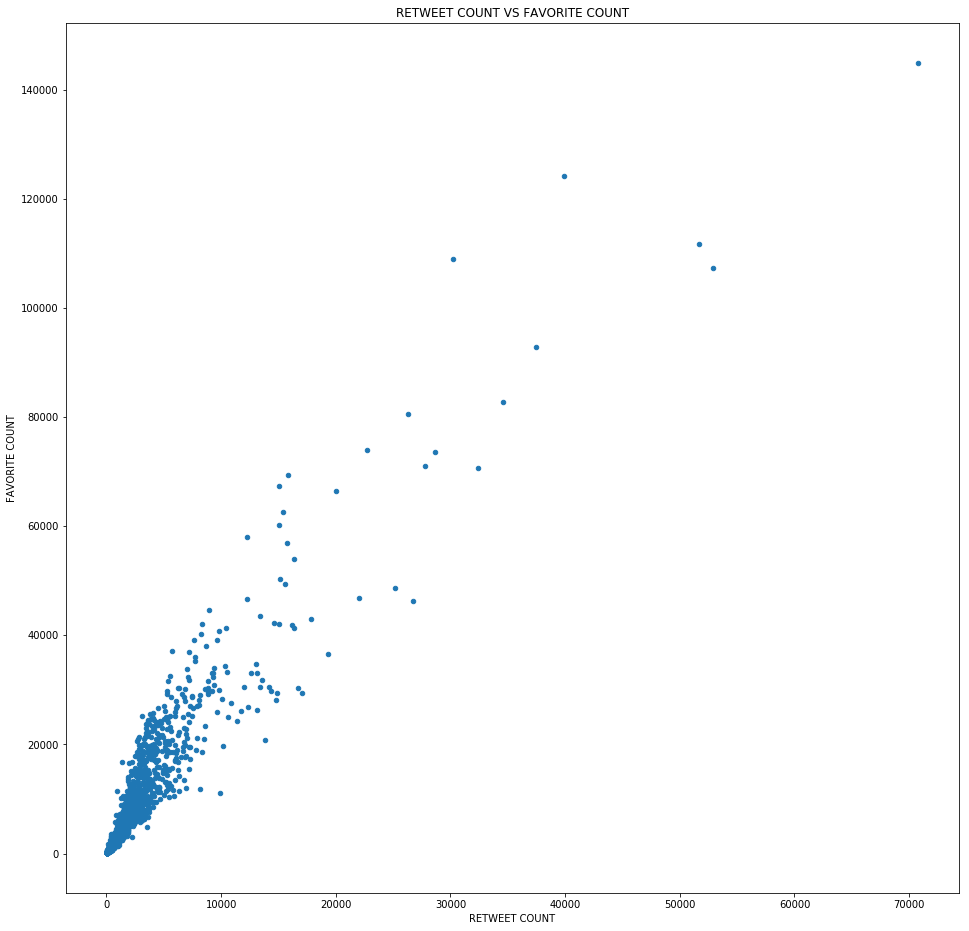

In [4]:
master_df.plot(x='retweet_count',y='favorite_count',kind='scatter',figsize=(16,16))
plt.title('RETWEET COUNT VS FAVORITE COUNT')
plt.xlabel('RETWEET COUNT')
plt.ylabel('FAVORITE COUNT')

The retweet counts have a strong relationship with the favorite counts

### Other insights

4. Retweet count and Favorite count have a strong relationship. From using sort values 744234799360020481 tweet id has the most favorite tweets and retweets while 666102155909144576 tweet id had the least favorite tweets and retweets.The scatter plot above also shows that retweet count and favorite count have a strong relationship.
5. Number of favorite tweets depend on the source. Twitter for iphone source has the most average favorite tweets meaning tweets from Twitter for iphone source are likely to have the most favorite tweets while tweets from TweetDeck source are likely to have the least favorite tweets.
6. Number of retweets depend on the source. Twitter for iphone source has the most average retweets meaning tweets from Twitter for iphone source are likely to have the most retweets while tweets from TweetDeck source are likely to have the least retweets.
7. The number of favourite tweets and retweets depend on the dog stage. The puppo dog stage has the highest average favorite count meaning tweets from dogs which are in the puppo stage are likely to have most favorited tweets while tweets from dogs which are in the pupper stage are likely to have the least favorited tweets and the doggo dog stage has the highest average retweet count meaning tweets from dogs which are in the doggo stage are likely to have most retweets while tweets from dogs which are in the pupper stage are likely to have the least retweets.
8. The number of favorite tweets and retweets depend on the dog breed. The Bedlington_terrier breed has the highest average favourite tweets which shows that tweets with the bedlington terrier breed are likely to have most favorited tweets and the Bedlington_terrier breed has the highest average retweets which shows that tweets with the bedlington terrier breed are likely to have most retweets.